# Text Analysis
## Case Study of Women's E-Commerce Clothing Reviews


In [1]:
# Import useful libararies used for reviews management
import pandas as pd
import numpy as np
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

# import libararies for evaluation measures
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# Read Data
reviews = pd.read_csv("Data/Womens Clothing E-Commerce Reviews.csv", engine='python',encoding = 'utf-8',index_col=0)


In [3]:
reviews.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


# Adjust column name 

In [4]:
reviews.columns = reviews.columns.str.replace(' ', '_')
reviews.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


# Rating vs Recommendation

In [5]:
reviews_sub1 = reviews[['Rating', 'Recommended_IND']]
reviews_sub1 = reviews_sub1.dropna()
reviews_sub1['Rating'] = reviews_sub1['Rating'].astype(str)
reviews_sub1 = reviews_sub1.groupby(['Rating'])['Recommended_IND'].sum()

In [6]:
reviews_sub1

Rating
1       16
2       94
3     1189
4     4909
5    13106
Name: Recommended_IND, dtype: int64

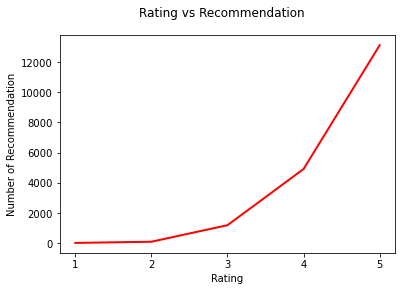

In [7]:
import matplotlib.pyplot as plt

plt.suptitle('Rating vs Recommendation')
plt.ylabel('Number of Recommendation')
plt.xlabel('Rating')
plt.plot(reviews_sub1.index, reviews_sub1.values, linewidth=2, color='red')

# Recommendations Among Categories

In [8]:
reviews['Class_Name'].value_counts()

Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: Class_Name, dtype: int64

In [9]:
reviews['Department_Name'].value_counts()

Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: Department_Name, dtype: int64

In [10]:
subject_sub2 = reviews[['Department_Name', 'Recommended_IND']]
subject_sub2 = subject_sub2.dropna()
subject_sub2 = subject_sub2.groupby(['Department_Name'])['Recommended_IND'].sum()

<BarContainer object of 6 artists>

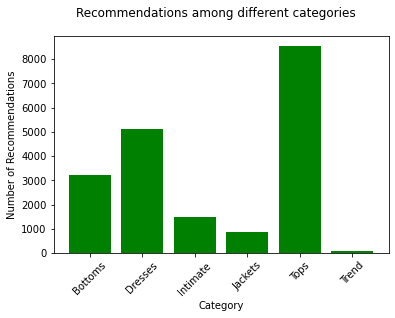

In [11]:
plt.suptitle('Recommendations among different categories')
plt.xticks(rotation=45)
plt.ylabel('Number of Recommendations')
plt.xlabel('Category')

plt.bar(subject_sub2.index, height=subject_sub2.values, color='green')

In [12]:
subject_sub3 = reviews[['Class_Name', 'Recommended_IND']]
subject_sub3 = subject_sub3.dropna()
subject_sub3 = subject_sub3.groupby(['Class_Name'])['Recommended_IND'].sum()

<BarContainer object of 20 artists>

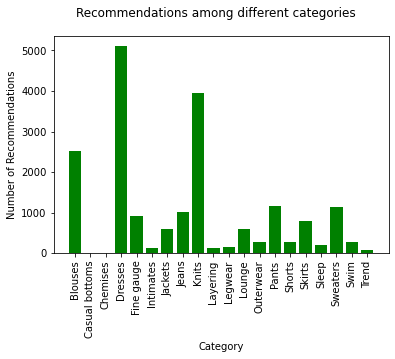

In [13]:
plt.suptitle('Recommendations among different categories')
plt.xticks(rotation=90)
plt.ylabel('Number of Recommendations')
plt.xlabel('Category')

plt.bar(subject_sub3.index, height=subject_sub3.values, color='green')

# Word Cloud

## Recommend Cloud

In [14]:
reviews_sub_clean = reviews[['Recommended_IND','Review_Text']]
reviews_sub_clean = reviews_sub_clean.dropna()
reviews_sub_clean

,Recommended_IND,Review_Text
0,1,Absolutely wonderful - silky and sexy and comf...
1,1,Love this dress! it's sooo pretty. i happene...
2,0,I had such high hopes for this dress and reall...
3,1,"I love, love, love this jumpsuit. it's fun, fl..."
4,1,This shirt is very flattering to all due to th...
...,...,...
23481,1,I was very happy to snag this dress at such a ...
23482,1,"It reminds me of maternity clothes. soft, stre..."
23483,0,"This fit well, but the top was very see throug..."
23484,1,I bought this dress for a wedding i have this ...


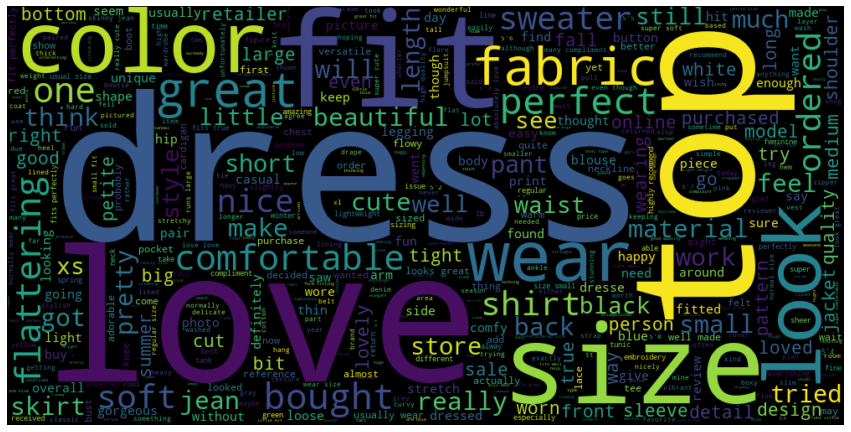

In [15]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (15,15))
wc_recommend = WordCloud(max_words = 500,
               width = 1000,
               height = 500,
               mode = "RGB",
               background_color= None,
               stopwords = STOPWORDS).generate(" ".join(reviews_sub_clean[reviews_sub_clean.Recommended_IND==1].Review_Text))
plt.imshow(wc_recommend , interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [16]:
wc_recommend.to_file('Word_Cloud/Recommend_Cloud.png')

## Not Recommend

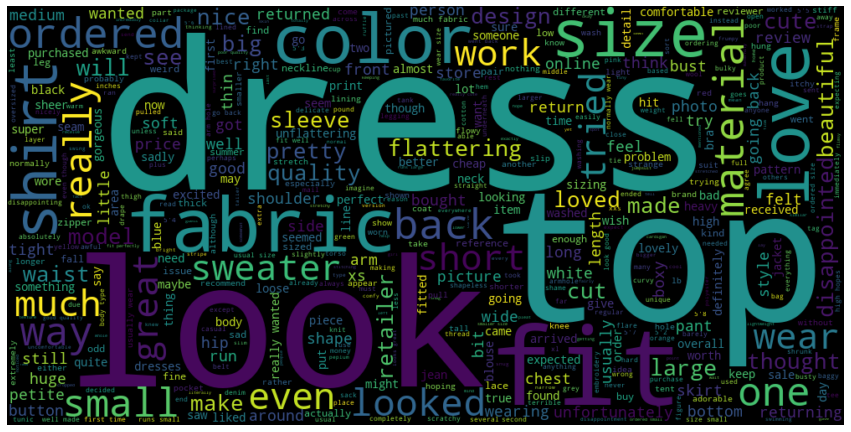

In [17]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (15,15))
wc_nonrecommend = WordCloud(max_words = 500,
               width = 1000,
               height = 500,
               mode = "RGB",
               background_color= None,
               stopwords = STOPWORDS).generate(" ".join(reviews_sub_clean[reviews_sub_clean.Recommended_IND==0].Review_Text))
plt.imshow(wc_nonrecommend , interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [18]:
wc_nonrecommend.to_file('Word_Cloud/Nonrecommend_Cloud.png')

# Part0: reviews Cleaning

In [19]:
# Clean reviews
def normalise_text(text):
    text = text.str.lower() # lowercase
    text = text.str.replace(r"\#","") # replaces hashtags
    text = text.str.replace(r"http\S+","URL")  # remove URL addresses
    text = text.str.replace(r"@","")
    text = text.str.replace(r"[^A-Za-z0-9()!?\'\`\"]", " ")
    text = text.str.replace("\s{2,}", " ")
    return text

In [20]:
reviews["Review_Text"]=normalise_text(reviews["Review_Text"])
reviews = reviews.dropna(subset=['Review_Text'])
reviews['Review_Text'].head()

0    absolutely wonderful silky and sexy and comfor...
1    love this dress! it's sooo pretty i happened t...
2    i had such high hopes for this dress and reall...
3    i love love love this jumpsuit it's fun flirty...
4    this shirt is very flattering to all due to th...
Name: Review_Text, dtype: object

# Part1: Text Features

## 1 Create text features

In [21]:
import textblob
import string
import nltk

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ymh23\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ymh23\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [22]:
# Add text features
reviews['char_count'] = reviews['Review_Text'].apply(len)
reviews['word_count'] = reviews['Review_Text'].apply(lambda x: len(x.split()))
reviews['word_density'] = reviews['char_count'] / (reviews['word_count']+1)
reviews['punctuation_count'] = reviews['Review_Text'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation)))
reviews['Title'] = reviews['Title'].fillna("") #To aviod error
reviews['title_word_count'] = reviews['Title'].apply(lambda x: len(x.split()))

In [23]:
# Add text tags
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' : ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']}

def check_pos_tag(x, flag):
  cnt = 0
  try:
    wiki = textblob.TextBlob(x)
    for tup in wiki.tags:
      ppo = list(tup)[1]
      if ppo in pos_family[flag]:
        cnt += 1
  except:
    pass
  return cnt

reviews['noun_count'] = reviews['Review_Text'].apply(lambda x: check_pos_tag(x, 'noun'))
reviews['verb_count'] = reviews['Review_Text'].apply(lambda x: check_pos_tag(x, 'verb'))
reviews['adj_count'] = reviews['Review_Text'].apply(lambda x: check_pos_tag(x, 'adj'))
reviews['adv_count'] = reviews['Review_Text'].apply(lambda x: check_pos_tag(x, 'adv'))
reviews['pron_count'] = reviews['Review_Text'].apply(lambda x: check_pos_tag(x, 'pron'))

In [24]:
reviews

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,char_count,word_count,word_density,punctuation_count,title_word_count,noun_count,verb_count,adj_count,adv_count,pron_count
0,767,33,,absolutely wonderful silky and sexy and comfor...,4,1,0,Initmates,Intimate,Intimates,51,7,6.375000,0,0,2,0,2,1,0
1,1080,34,,love this dress! it's sooo pretty i happened t...,5,1,4,General,Dresses,Dresses,292,62,4.634921,6,0,13,16,7,5,7
2,1077,60,Some major design flaws,i had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,490,97,5.000000,5,4,17,15,21,10,6
3,1049,50,My favorite buy!,i love love love this jumpsuit it's fun flirty...,5,1,0,General Petite,Bottoms,Pants,118,22,5.130435,3,3,9,4,4,0,2
4,847,47,Flattering shirt,this shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,190,36,5.135135,3,2,7,5,5,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,i was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,131,28,4.517241,2,5,6,5,4,3,1
23482,862,48,Wish it was made of cotton,it reminds me of maternity clothes soft stretc...,3,1,0,General Petite,Tops,Knits,212,38,5.435897,0,6,8,9,5,6,3
23483,1104,31,"Cute, but see through",this fit well but the top was very see through...,3,0,1,General Petite,Dresses,Dresses,203,42,4.720930,2,4,6,10,5,5,4
23484,1084,28,"Very cute dress, perfect for summer parties an...",i bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,417,85,4.848837,3,9,16,17,8,10,8


## 2 Identify useful text feature

### 2.1 Count Recommendations based on text features

In [25]:
feature_sub_rec = reviews[['char_count','word_count','word_density','punctuation_count','title_word_count','Recommended_IND']]
feature_sub_rec = feature_sub_rec.dropna()
# Build subset for each text feature
feature_sub_rec_cc = feature_sub_rec.groupby(['char_count'])['Recommended_IND'].sum()
feature_sub_rec_wc = feature_sub_rec.groupby(['word_count'])['Recommended_IND'].sum()
feature_sub_rec_wd = feature_sub_rec.groupby(['word_density'])['Recommended_IND'].sum()
feature_sub_rec_pc = feature_sub_rec.groupby(['punctuation_count'])['Recommended_IND'].sum()
feature_sub_rec_twc = feature_sub_rec.groupby(['title_word_count'])['Recommended_IND'].sum()

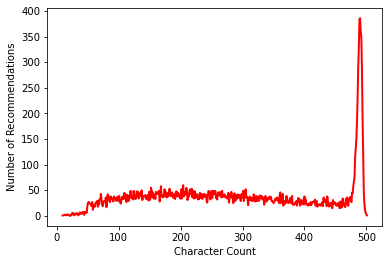

In [26]:
plt.ylabel('Number of Recommendations')
plt.xlabel('Character Count')
plt.plot(feature_sub_rec_cc.index, feature_sub_rec_cc.values, linewidth=2, color='red')

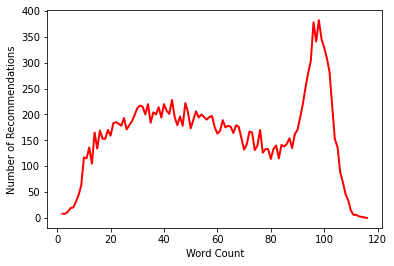

In [27]:
plt.ylabel('Number of Recommendations')
plt.xlabel('Word Count')
plt.plot(feature_sub_rec_wc.index, feature_sub_rec_wc.values, linewidth=2, color='red')

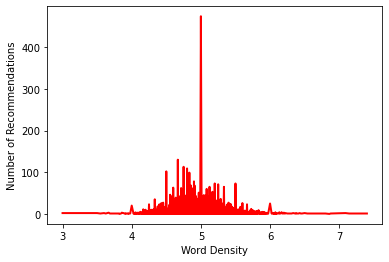

In [28]:
plt.ylabel('Number of Recommendations')
plt.xlabel('Word Density')
plt.plot(feature_sub_rec_wd.index, feature_sub_rec_wd.values, linewidth=2, color='red')

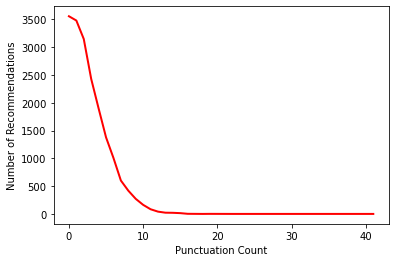

In [29]:
plt.ylabel('Number of Recommendations')
plt.xlabel('Punctuation Count')
plt.plot(feature_sub_rec_pc.index, feature_sub_rec_pc.values, linewidth=2, color='red')

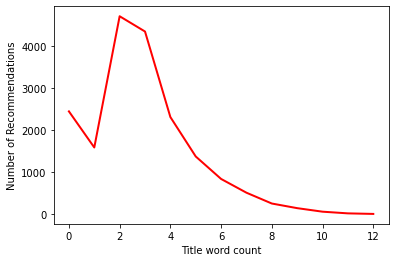

In [30]:

plt.ylabel('Number of Recommendations')
plt.xlabel('Title word count')
plt.plot(feature_sub_rec_twc.index, feature_sub_rec_twc.values, linewidth=2, color='red')

### 2.2 Count Non-recommendations based on text features

In [31]:
# Redefine the label none Recommended
feature_sub_rec['Recommended_IND'] = [0 if x==1 else 1 for x in feature_sub_rec['Recommended_IND']]
feature_sub_nonrec = feature_sub_rec.dropna()
# Build subset for each text feature
feature_sub_nonrec_cc = feature_sub_nonrec.groupby(['char_count'])['Recommended_IND'].sum()
feature_sub_nonrec_wc = feature_sub_nonrec.groupby(['word_count'])['Recommended_IND'].sum()
feature_sub_nonrec_wd = feature_sub_nonrec.groupby(['word_density'])['Recommended_IND'].sum()
feature_sub_nonrec_pc = feature_sub_nonrec.groupby(['punctuation_count'])['Recommended_IND'].sum()
feature_sub_nonrec_twc = feature_sub_nonrec.groupby(['title_word_count'])['Recommended_IND'].sum()

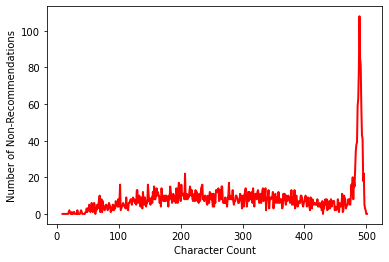

In [32]:
plt.ylabel('Number of Non-Recommendations')
plt.xlabel('Character Count')
plt.plot(feature_sub_nonrec_cc.index, feature_sub_nonrec_cc.values, linewidth=2, color='red')

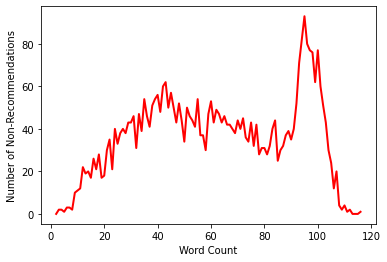

In [33]:
plt.ylabel('Number of Non-Recommendations')
plt.xlabel('Word Count')
plt.plot(feature_sub_nonrec_wc.index, feature_sub_nonrec_wc.values, linewidth=2, color='red')

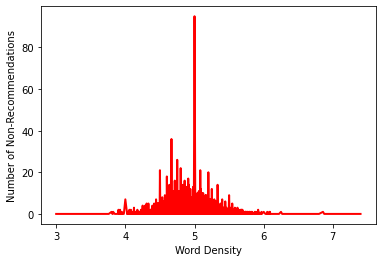

In [34]:
plt.ylabel('Number of Non-Recommendations')
plt.xlabel('Word Density')
plt.plot(feature_sub_nonrec_wd.index, feature_sub_nonrec_wd.values, linewidth=2, color='red')

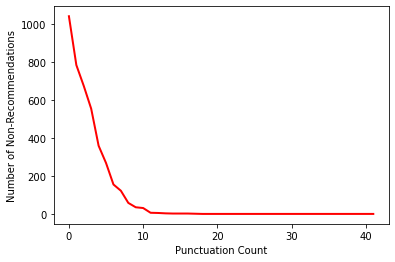

In [35]:

plt.ylabel('Number of Non-Recommendations')
plt.xlabel('Punctuation Count')
plt.plot(feature_sub_nonrec_pc.index, feature_sub_nonrec_pc.values, linewidth=2, color='red')

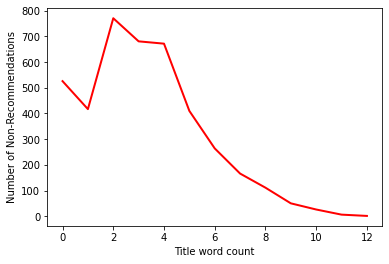

In [36]:
plt.ylabel('Number of Non-Recommendations')
plt.xlabel('Title word count')
plt.plot(feature_sub_nonrec_twc.index, feature_sub_nonrec_twc.values, linewidth=2, color='red')

# Train Test Split

In [37]:
# Now let's do train/test split on the data (70% train, 30% test)

from sklearn.model_selection import train_test_split
train, test = train_test_split(reviews[['Review_Text','Recommended_IND','char_count','word_count','word_density','punctuation_count','title_word_count']], test_size=0.3 , random_state=1)

X_train = train['Review_Text']
y_train = train['Recommended_IND']
train_meta = train[['char_count','word_count','word_density','punctuation_count','title_word_count']]
X_test = test['Review_Text']
y_test = test['Recommended_IND']
test_meta = test[['char_count','word_count','word_density','punctuation_count','title_word_count']]


In [38]:
X_train.shape

(15848,)

In [39]:
X_test.shape

(6793,)

In [40]:
y_train.value_counts()

1    12953
0     2895
Name: Recommended_IND, dtype: int64

In [41]:
train_meta.shape

(15848, 5)

# Part2: Embedding

## 1 CountVector

In [42]:
# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
# Vectorize the data
# When building the vocabulary ignore terms that have a document frequency strictly lower than the min_df (proportion), or higher than max_df
word2vec = CountVectorizer(encoding='utf-8',stop_words='english',min_df=0.01, max_df=0.8)

In [44]:
X_train_w2v = word2vec.fit_transform(X_train)
X_test_w2v = word2vec.transform(X_test)

## 2 TF-IDF

In [45]:
# Import the TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
# Vectorize the data
tfidf = TfidfVectorizer(encoding='utf-8',stop_words='english',min_df=0.01, max_df=0.8)

In [47]:
# Transform the training data
X_train_tfidf = tfidf.fit_transform(X_train)
# Transform the test data 
X_test_tfidf = tfidf.transform(X_test)

## 3 Ngram

### 3.1 -- 2-gram

In [48]:
# Vectorize the data
# When building the vocabulary ignore terms that have a document frequency strictly lower than the min_df (proportion), or higher than max_df
ngram_2 = CountVectorizer(encoding='utf-8',stop_words='english',ngram_range=(2, 2),min_df=0.01, max_df=0.8) # 2-gram

In [49]:
# Transform the training data
X_train_ngram2 = ngram_2.fit_transform(X_train)
# Transform the test data
X_test_ngram2 = ngram_2.transform(X_test)

In [50]:
X_train_ngram2.shape

(15848, 53)

### 3.2 -- 3-gram

In [51]:
# Vectorize the data
# When building the vocabulary ignore terms that have a document frequency strictly lower than the min_df (proportion), or higher than max_df
ngram_3 = CountVectorizer(encoding='utf-8',stop_words='english',ngram_range=(3, 3),min_df=0.01, max_df=0.8) # 3-gram

In [52]:
# Transform the training data
X_train_ngram3 = ngram_3.fit_transform(X_train)
# Transform the test data
X_test_ngram3 = ngram_3.transform(X_test)

In [53]:
X_train_ngram3.shape

(15848, 2)

# Part3: Models

## 1 Naive Bayes Model

In [54]:
# Import Multinomial Naive Bayes model from sklearn
from sklearn.naive_bayes import MultinomialNB

# Create a Multinomial Naive Bayes Classifier
mnb = MultinomialNB()

## 2 Logistic Regression Model

In [55]:
# Import Logistic regression model from sklearn
from sklearn.linear_model import LogisticRegression

# Create a Logistic Classifier
logit = LogisticRegression()

## 3 Support Vector Machine(SVM)

In [56]:
# Import cross validation for model selection
from sklearn.model_selection import GridSearchCV
# Import Support Vector Machine model from sklearn
from sklearn.svm import SVC

In [57]:
def svm_model(X_train, y_train,cv=False):
    if cv:
        model = SVC()
    else:
        model = SVC()
        param_grid = {'kernel':['rbf', 'poly', 'sigmoid','linear'],
              'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000], 
              'gamma': [0.5,0.01,0.001]}
        grid_search = GridSearchCV(model, param_grid, n_jobs = 8, verbose=1)
        grid_search.fit(X_train, y_train)
        best_parameters = grid_search.best_estimator_.get_params()
    for para, val in list(best_parameters.items()):
        print(para, val)
    model = SVC(kernel=best_parameters['kernel'],
                  C=best_parameters['C'],
                  gamma=best_parameters['gamma'], probability=True)
    return model

In [58]:
svm = SVC(probability=True)

## 4 Decision Tree Model

In [59]:
# Import Decision Tree Classifier from sklearn
from sklearn.tree import DecisionTreeClassifier

In [60]:
#finding best fit with gridsearch
def tree_model(X_train, y_train,cv=False):
    if cv:
        clf = DecisionTreeClassifier()
    else:
        param_grid = {'min_samples_leaf':np.arange(15,20,1),
            'max_depth':np.arange(4,50),
            'criterion':['gini','entropy']}
    clf = DecisionTreeClassifier()
    tree_search = GridSearchCV(clf, param_grid, scoring='average_precision',n_jobs = 8, verbose=1)
    tree_search.fit(X_train,y_train)
    best_parameters = tree_search.best_estimator_.get_params()
    for para, val in list(best_parameters.items()):
        print(para, val)
    clf = DecisionTreeClassifier(min_samples_leaf=best_parameters['min_samples_leaf'],
                    min_samples_split=best_parameters['min_samples_split'],
                    max_depth=best_parameters['max_depth'],
                    criterion=best_parameters['criterion'])
    return clf   

In [61]:
# Create a Decision tree Classifier
tree = DecisionTreeClassifier()


## 5 Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf = RandomForestClassifier(n_estimators=100)

## 6 Adaboost

In [64]:
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=0.5)

## 7 GRU

In [65]:
!pip install pytorch_pretrained_bert

In [66]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from pytorch_pretrained_bert import BertModel
from torch.autograd import Variable

class bigru_attention(nn.Module):
    def __init__(self, bert_config, tagset_size, embedding_dim, hidden_dim, rnn_layers, dropout_ratio, dropout1, use_cuda):
        super(bigru_attention, self).__init__()
        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim
        self.rnn_layers = rnn_layers
        self.word_embeds = BertModel.from_pretrained(bert_config)
        # 双向GRU，//操作为了与后面的Attention操作维度匹配，hidden_dim要取偶数！
        self.bigru = nn.GRU(embedding_dim, hidden_dim, num_layers=rnn_layers, bidirectional=True,dropout=dropout_ratio, batch_first=True)
        self.dropout1 = nn.Dropout(p=dropout1)
        # 由nn.Parameter定义的变量都为requires_grad=True状态
        self.weight_W = nn.Parameter(torch.Tensor(hidden_dim*2, hidden_dim*2))
        self.weight_proj = nn.Parameter(torch.Tensor(hidden_dim*2, 1))
        self.fc = nn.Linear(hidden_dim*2,tagset_size)
        nn.init.uniform_(self.weight_W, -0.1, 0.1)
        nn.init.uniform_(self.weight_proj, -0.1, 0.1)
        self.use_cuda =  use_cuda

    def rand_init_hidden(self, batch_size):
        if self.use_cuda:
            return Variable(
                torch.randn(2 * self.rnn_layers, batch_size, self.hidden_dim)).cuda(), Variable(
                torch.randn(2 * self.rnn_layers, batch_size, self.hidden_dim)).cuda()
        else:
            return Variable(
                torch.randn(2 * self.rnn_layers, batch_size, self.hidden_dim)), Variable(
                torch.randn(2 * self.rnn_layers, batch_size, self.hidden_dim))
 
    def forward(self, sentence, attention_mask=None):
        batch_size = sentence.size(0)
        seq_length = sentence.size(1)
        embeds, _ = self.word_embeds(sentence, attention_mask=attention_mask, output_all_encoded_layers=False)
        hidden = self.rand_init_hidden(batch_size)
        gru_out, hiden = self.bigru(embeds) # [seq_len, bs, hid_dim]
        d_gru_out = self.dropout1(gru_out)
        x = d_gru_out
        # # # Attention过程，与上图中三个公式对应
        u = torch.tanh(torch.matmul(x, self.weight_W))
        att = torch.matmul(u, self.weight_proj)
        att_score = F.softmax(att, dim=1)
        scored_x = x * att_score
        # # # Attention过程结束
        feat = torch.sum(scored_x, dim=1)
        y = self.fc(feat)
        return y

In [67]:
!pip install snownlp
from snownlp import SnowNLP
class InputFeatures(object):
    def __init__(self, text, input_id, input_mask):
        self.text = text
        self.input_id = input_id
        self.input_mask = input_mask
def load_vocab(vocab_file):
    vocab = {}
    index = 0
    with open(vocab_file, "r", encoding="utf-8") as reader:
        while True:
            token = reader.readline()
            if not token:
                break
            token = token.strip()
            vocab[token] = index
            index += 1
    return vocab

def load(data):
    texts = []
    for line in data:
        if line != '\n':
            s=SnowNLP(line)
            text = s.words
            texts.append(text)
    return texts
 
def load_data(data, max_length, vocab):
    texts= load(data)
    result = []
    for i in range(len(texts)):
        token = texts[i]
        if len(token) > max_length-2:
            token = token[0:(max_length-2)]
        tokens_f =['[CLS]'] + token + ['[SEP]']
        input_ids = [int(vocab[i]) if i in vocab else int(vocab['[UNK]']) for i in tokens_f]
        mask_bool=1
        input_mask = [mask_bool] * len(input_ids)
        while len(input_ids) < max_length:
            input_ids.append(0)
            input_mask.append(0)
        assert len(input_ids) == max_length
        assert len(input_mask) == max_length
        feature = InputFeatures(text=tokens_f, input_id=input_ids, input_mask=input_mask)
        result.append(feature)
    return result

  Created wheel for snownlp: filename=snownlp-0.12.3-py3-none-any.whl size=37760957 sha256=861c00f811dd63d5b076d20d4c985bad7db5801131959b7440396f10de39c920
  Stored in directory: c:\users\ymh23\appdata\local\pip\cache\wheels\09\14\c5\ea9aee34229caa97c6f6ff78c82c7f2b1a3423c1f37227b6a6
Successfully built snownlp


In [72]:
max_length=100
vocab_file='Data/vocab.txt'
save_model_dir = 'Data'
batch_size=10
tagset_size = 2
epochs=10

In [73]:
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report
if torch.cuda.is_available():
    device = torch.device("cuda", 0)
    print('device',device)
    use_cuda = True
else:
    device = torch.device("cpu")
    use_cuda = False
vocab = load_vocab(vocab_file)
train_data = load_data(X_train, max_length=max_length, vocab=vocab)
train_ids = torch.LongTensor([temp.input_id for temp in train_data])
train_masks = torch.LongTensor([temp.input_mask for temp in train_data])
train_tags = torch.LongTensor(list(y_train))
train_dataset = TensorDataset(train_ids, train_masks, train_tags)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)

dev_data = load_data(X_test, max_length=max_length, vocab=vocab)
dev_ids = torch.LongTensor([temp.input_id for temp in dev_data])
dev_masks = torch.LongTensor([temp.input_mask for temp in dev_data])
dev_tags = torch.LongTensor(list(y_test))
dev_dataset = TensorDataset(dev_ids, dev_masks, dev_tags)
dev_loader = DataLoader(dev_dataset, shuffle=True, batch_size=batch_size)

The following hashed code for training the GRU, we alsready train the model and saved it in Data folder

In [74]:
# from sklearn.metrics import f1_score
# model = bigru_attention('bert-base-uncased', tagset_size, 768, 200, 1,
#                       dropout_ratio=0.4, dropout1=0.4, use_cuda = use_cuda)
# if use_cuda:
#     model.cuda()
# model.train()
# losser=torch.nn.CrossEntropyLoss()
# optimizer = getattr(optim, 'Adam')
# optimizer = optimizer(model.parameters(), lr=0.00003, weight_decay=0.00005)
# best_f = -100
# for epoch in range(epochs):
#     print('epoch: {}train'.format(epoch))
#     for i, train_batch in enumerate(tqdm(train_loader)):
#         model.train()
#         model.zero_grad()
#         sentence, masks, tags = train_batch
#         sentence, masks, tags = Variable(sentence), Variable(masks), Variable(tags)
#         if use_cuda:
#             sentence = sentence.cuda()
#             masks = masks.cuda()
#             tags = tags.cuda()
#         loss = losser(model(sentence),tags)
#         loss.backward()
#         optimizer.step()
#     print('epoch: {}loss: {}'.format(epoch, loss.item()))
#     model.eval()
#     pred = []
#     true=[]
#     for i, dev_batch in enumerate(tqdm(dev_loader)):
#         model.zero_grad()
#         sentence, masks, tags = dev_batch
#         sentence, masks, tags = Variable(sentence), Variable(masks), Variable(tags)
#         if use_cuda:
#             sentence = sentence.cuda()
#             asks = masks.cuda()
#             tags = tags.cuda()
#         predict_tags = F.softmax(model(sentence)).tolist()
#         pred_tag=[np.argmax(i) for i in predict_tags]
#         pred.extend(pred_tag)
#         true.extend(tags.tolist())
#     print(classification_report(true, pred))
#     f=f1_score(true, pred, zero_division=1)
#     if f > best_f:
#         model_name = save_model_dir + '/Project_' + str(epochs) + ".pkl"# save the best model based on f
#         torch.save(model.state_dict(), model_name)
#         best_f = f#update best f

In [89]:
def fire():
    import torch
    model =bigru_attention('bert-base-uncased', tagset_size, 768, 200, 1,
                        dropout_ratio=0.4, dropout1=0.4, use_cuda = use_cuda)
    if use_cuda==True:
        model.load_state_dict(torch.load('Data/Project_10.pkl'))#read the model path
        model.cuda()
    else:
        model.load_state_dict(torch.load('Data/Project_10.pkl',map_location=torch.device('cpu')))
    pred = []
    true=[]
    model.eval()
    for i, dev_batch in enumerate(tqdm(dev_loader)):
        model.zero_grad()
        sentence, masks, tags = dev_batch
        sentence, masks, tags = Variable(sentence), Variable(masks), Variable(tags)
        if use_cuda:
            sentence = sentence.cuda()
            masks = masks.cuda()
            tags = tags.cuda()
        predict_tags = F.softmax(model(sentence)).tolist()
        pred_tag=[np.argmax(i) for i in predict_tags]
        pred.extend(pred_tag)
        true.extend(tags.tolist())
    #print(classification_report(true, pred))
    return pred


In [86]:
use_cuda

False

# Part4 Model Fitting and Prediction

## 1 Train Model

In [91]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
def train_model(classifier=None, feature_vector_train=None, label=None,feature_vector_valid=None, is_neural_net=False,os_data=False):
    if is_neural_net==True:
      # this is an example you can adjust freely
        y_pred =fire()
    else:
    # fit the training dataset on the classifier
        classifier.fit(feature_vector_train, label)

        # predict the labels on validation dataset
        y_pred = classifier.predict(feature_vector_valid)

    print(classifier.__class__.__name__)
    print("===============================")
    print("Accuracy:")
    print(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("===============================================================")
    if is_neural_net==False:
        if os_data == False:
            fpr, tpr, _ = roc_curve(y_train, classifier.predict_proba(feature_vector_train)[:, 1])
        else:
            fpr, tpr, _ = roc_curve(os_data_Y, classifier.predict_proba(feature_vector_train)[:, 1])
        test_fpr, test_tpr, _ = roc_curve(y_test, classifier.predict_proba(feature_vector_valid)[:, 1])

        fig, ax = plt.subplots(1, 2, figsize=(10,5))
        ax[0].plot(fpr, tpr)
        ax[0].plot([0, 1], [0, 1], linestyle = '--')
        ax[0].set_title('Train')
        ax[0].set_xlabel('TPR')
        ax[0].set_ylabel('FPR')
        ax[1].plot(test_fpr, test_tpr)
        ax[1].plot([0, 1], [0, 1], linestyle = '--')
        ax[1].set_title('Test')
        ax[1].set_xlabel('TPR')
        ax[1].set_ylabel('FPR')
        plt.show()
        print('Train AUC:', auc(fpr, tpr))
        print('Test AUC:', auc(test_fpr, test_tpr))

## 2.1 Train Set

In [77]:
Train_set = [X_train_w2v, X_train_tfidf, X_train_ngram2, X_train_ngram3]

## 2.2 Test Set

In [78]:
Test_set = [X_test_w2v, X_test_tfidf, X_test_ngram2, X_test_ngram3]

## 3 Test Results

### 3.1 Naive Bayes Model

Word to Vector
MultinomialNB
Accuracy:
0.8667746209333137
Confusion Matrix:
[[ 802  404]
 [ 501 5086]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.67      0.64      1206
           1       0.93      0.91      0.92      5587

    accuracy                           0.87      6793
   macro avg       0.77      0.79      0.78      6793
weighted avg       0.87      0.87      0.87      6793



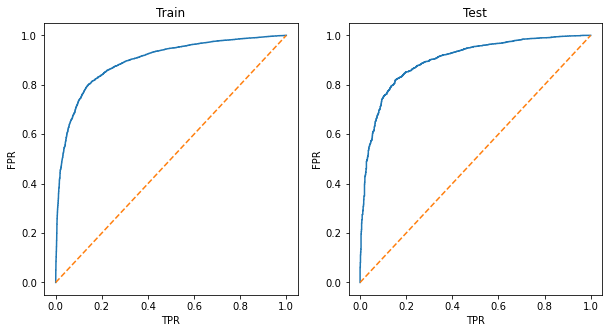

Train AUC: 0.8966911060274112
Test AUC: 0.8995363852534951
TF-IDF
MultinomialNB
Accuracy:
0.8473428529368467
Confusion Matrix:
[[ 199 1007]
 [  30 5557]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.17      0.28      1206
           1       0.85      0.99      0.91      5587

    accuracy                           0.85      6793
   macro avg       0.86      0.58      0.60      6793
weighted avg       0.85      0.85      0.80      6793



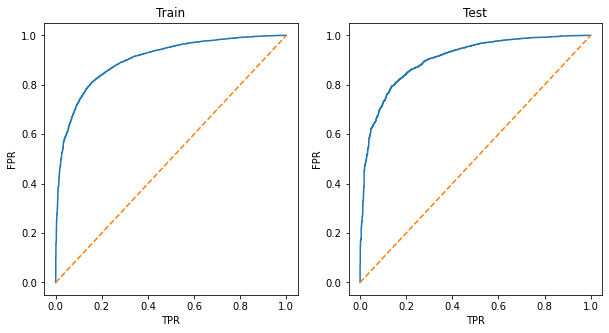

Train AUC: 0.9020149105567931
Test AUC: 0.9039322509224654
2-GRAM
MultinomialNB
Accuracy:
0.8335050787575445
Confusion Matrix:
[[ 155 1051]
 [  80 5507]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.13      0.22      1206
           1       0.84      0.99      0.91      5587

    accuracy                           0.83      6793
   macro avg       0.75      0.56      0.56      6793
weighted avg       0.81      0.83      0.78      6793



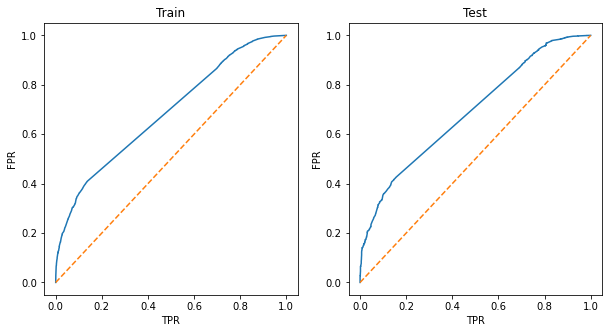

Train AUC: 0.6857261546227912
Test AUC: 0.6895239363115215
3-GRAM
MultinomialNB
Accuracy:
0.8224643014868247
Confusion Matrix:
[[   0 1206]
 [   0 5587]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1206
           1       0.82      1.00      0.90      5587

    accuracy                           0.82      6793
   macro avg       0.41      0.50      0.45      6793
weighted avg       0.68      0.82      0.74      6793



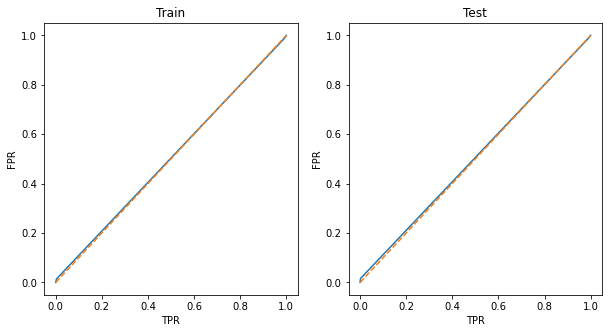

Train AUC: 0.5034894857680624
Test AUC: 0.505943969075332


In [92]:
# Train the NB model using training set
for i in range(len(Train_set)):
  if i ==0:
    print('Word to Vector')
  elif i ==1:
    print('TF-IDF')
  elif i ==2:
    print('2-GRAM')
  else:
    print('3-GRAM')
  train_model(mnb, Train_set[i], y_train,Test_set[i], is_neural_net=False)

### 3.2 Logistic Regression Model

Word to Vector
LogisticRegression
Accuracy:
0.8770793463859856
Confusion Matrix:
[[ 611  595]
 [ 240 5347]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.51      0.59      1206
           1       0.90      0.96      0.93      5587

    accuracy                           0.88      6793
   macro avg       0.81      0.73      0.76      6793
weighted avg       0.87      0.88      0.87      6793



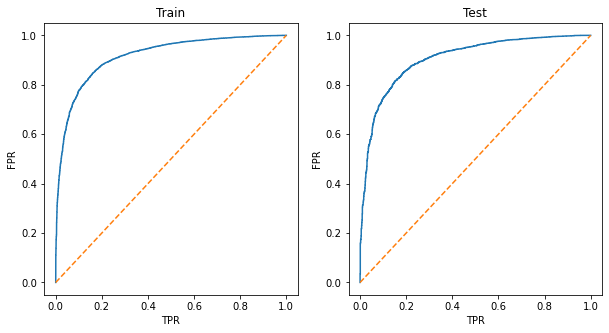

Train AUC: 0.916548096632611
Test AUC: 0.9053835885900727
TF-IDF
LogisticRegression
Accuracy:
0.8819372883851023
Confusion Matrix:
[[ 582  624]
 [ 178 5409]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.48      0.59      1206
           1       0.90      0.97      0.93      5587

    accuracy                           0.88      6793
   macro avg       0.83      0.73      0.76      6793
weighted avg       0.87      0.88      0.87      6793



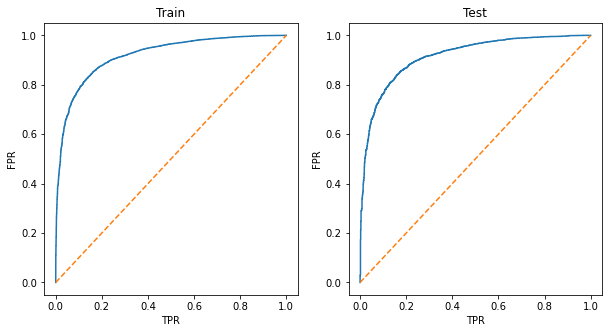

Train AUC: 0.9196496247160086
Test AUC: 0.9150821276945622
2-GRAM
LogisticRegression
Accuracy:
0.8339467098483734
Confusion Matrix:
[[ 126 1080]
 [  48 5539]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.10      0.18      1206
           1       0.84      0.99      0.91      5587

    accuracy                           0.83      6793
   macro avg       0.78      0.55      0.55      6793
weighted avg       0.82      0.83      0.78      6793



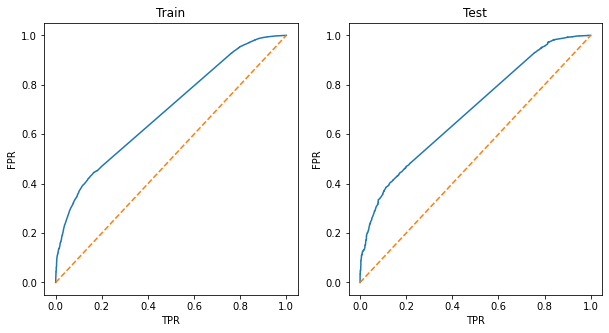

Train AUC: 0.6928109158300094
Test AUC: 0.6936167411851902
3-GRAM
LogisticRegression
Accuracy:
0.8224643014868247
Confusion Matrix:
[[   0 1206]
 [   0 5587]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1206
           1       0.82      1.00      0.90      5587

    accuracy                           0.82      6793
   macro avg       0.41      0.50      0.45      6793
weighted avg       0.68      0.82      0.74      6793



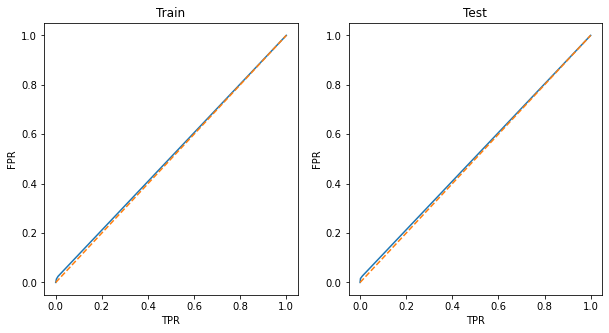

Train AUC: 0.5073753027919325
Test AUC: 0.508148506319901


In [80]:
# Train the logit model using training set 
for i in range(len(Train_set)):
  if i ==0:
    print('Word to Vector')
  elif i ==1:
    print('TF-IDF')
  elif i ==2:
    print('2-GRAM')
  else:
    print('3-GRAM')
  train_model(logit, Train_set[i], y_train,Test_set[i], is_neural_net=False)

### 3.3 Support Vector Machine(SVM)

Word to Vector
SVC
Accuracy:
0.8835566023848079
Confusion Matrix:
[[ 553  653]
 [ 138 5449]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.46      0.58      1206
           1       0.89      0.98      0.93      5587

    accuracy                           0.88      6793
   macro avg       0.85      0.72      0.76      6793
weighted avg       0.88      0.88      0.87      6793



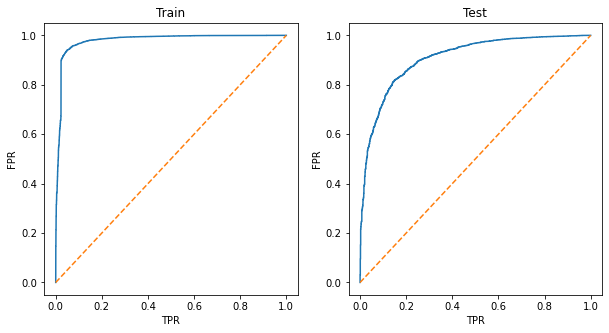

Train AUC: 0.9791415809542325
Test AUC: 0.9080294340005717
TF-IDF
SVC
Accuracy:
0.8838510231120271
Confusion Matrix:
[[ 568  638]
 [ 151 5436]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.47      0.59      1206
           1       0.89      0.97      0.93      5587

    accuracy                           0.88      6793
   macro avg       0.84      0.72      0.76      6793
weighted avg       0.88      0.88      0.87      6793



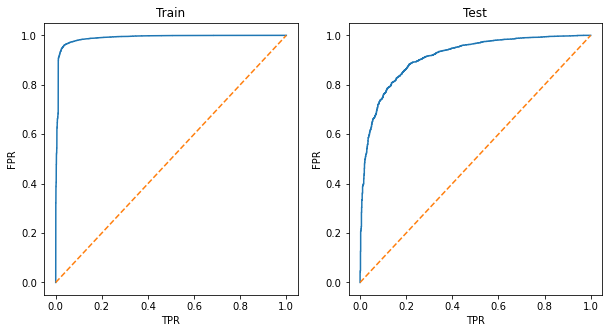

Train AUC: 0.98940931255781
Test AUC: 0.9137524150620919
2-GRAM
SVC
Accuracy:
0.8310025025761814
Confusion Matrix:
[[ 110 1096]
 [  52 5535]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.09      0.16      1206
           1       0.83      0.99      0.91      5587

    accuracy                           0.83      6793
   macro avg       0.76      0.54      0.53      6793
weighted avg       0.81      0.83      0.77      6793



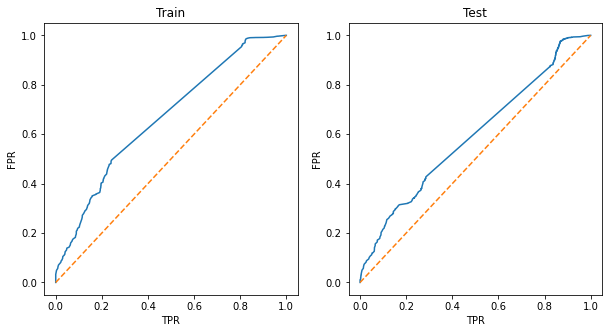

Train AUC: 0.6649917524324357
Test AUC: 0.592724359231229
3-GRAM
SVC
Accuracy:
0.8224643014868247
Confusion Matrix:
[[   0 1206]
 [   0 5587]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1206
           1       0.82      1.00      0.90      5587

    accuracy                           0.82      6793
   macro avg       0.41      0.50      0.45      6793
weighted avg       0.68      0.82      0.74      6793



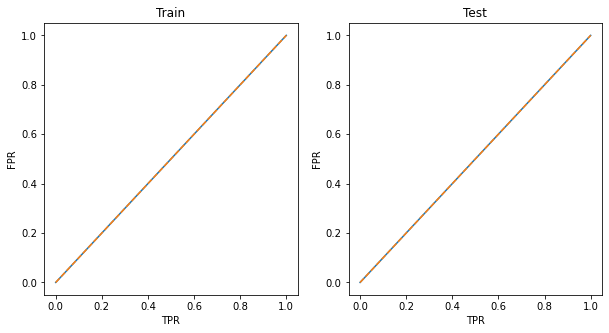

Train AUC: 0.5
Test AUC: 0.5


In [81]:
# Train using SVM model
for i in range(len(Train_set)):
  if i ==0:
    print('Word to Vector')
  elif i ==1:
    print('TF-IDF')
  elif i ==2:
    print('2-GRAM')
  else:
    print('3-GRAM')
  train_model(svm, Train_set[i], y_train,Test_set[i], is_neural_net=False)

### 3.4 Decision Tree Model

Word to Vector
DecisionTreeClassifier
Accuracy:
0.7972913293095834
Confusion Matrix:
[[ 556  650]
 [ 727 4860]]
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.46      0.45      1206
           1       0.88      0.87      0.88      5587

    accuracy                           0.80      6793
   macro avg       0.66      0.67      0.66      6793
weighted avg       0.80      0.80      0.80      6793



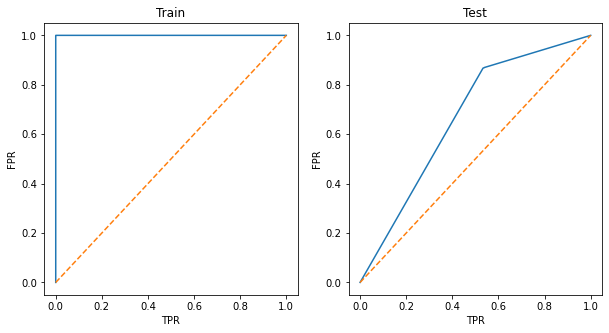

Train AUC: 0.9999998799965919
Test AUC: 0.6673000221730083
TF-IDF
DecisionTreeClassifier
Accuracy:
0.8137788900338584
Confusion Matrix:
[[ 560  646]
 [ 619 4968]]
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.46      0.47      1206
           1       0.88      0.89      0.89      5587

    accuracy                           0.81      6793
   macro avg       0.68      0.68      0.68      6793
weighted avg       0.81      0.81      0.81      6793



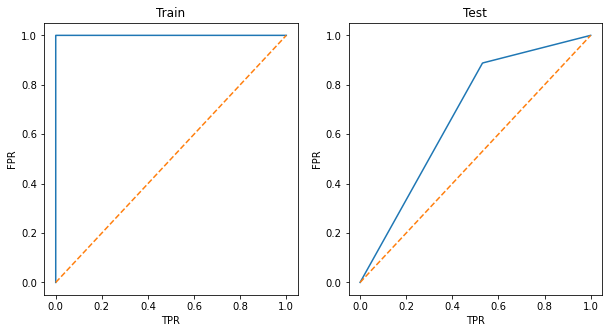

Train AUC: 0.9999998799965919
Test AUC: 0.6785565341955576
2-GRAM
DecisionTreeClassifier
Accuracy:
0.823789194759311
Confusion Matrix:
[[ 151 1055]
 [ 142 5445]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.13      0.20      1206
           1       0.84      0.97      0.90      5587

    accuracy                           0.82      6793
   macro avg       0.68      0.55      0.55      6793
weighted avg       0.78      0.82      0.78      6793



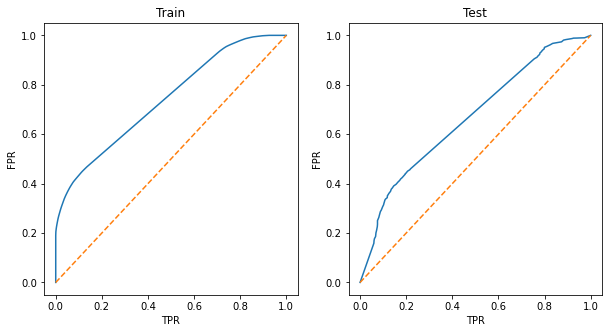

Train AUC: 0.7398752924583057
Test AUC: 0.6653904571765599
3-GRAM
DecisionTreeClassifier
Accuracy:
0.8224643014868247
Confusion Matrix:
[[   0 1206]
 [   0 5587]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1206
           1       0.82      1.00      0.90      5587

    accuracy                           0.82      6793
   macro avg       0.41      0.50      0.45      6793
weighted avg       0.68      0.82      0.74      6793



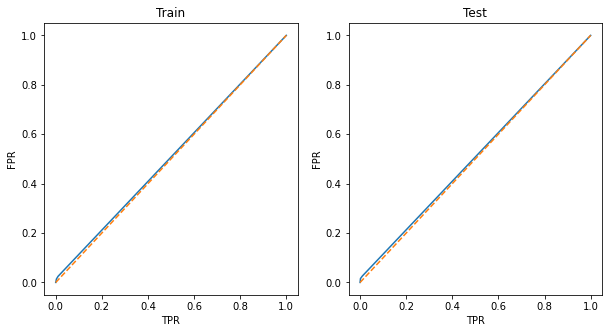

Train AUC: 0.5073753027919325
Test AUC: 0.5081476158376426


In [82]:
# Train the decision tree model
for i in range(len(Train_set)):
  if i ==0:
    print('Word to Vector')
  elif i ==1:
    print('TF-IDF')
  elif i ==2:
    print('2-GRAM')
  else:
    print('3-GRAM')
  train_model(tree, Train_set[i], y_train,Test_set[i], is_neural_net=False)


### 3.5 Random Forest

Word to Vector
RandomForestClassifier
Accuracy:
0.8660385691152657
Confusion Matrix:
[[ 426  780]
 [ 130 5457]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.35      0.48      1206
           1       0.87      0.98      0.92      5587

    accuracy                           0.87      6793
   macro avg       0.82      0.66      0.70      6793
weighted avg       0.86      0.87      0.85      6793



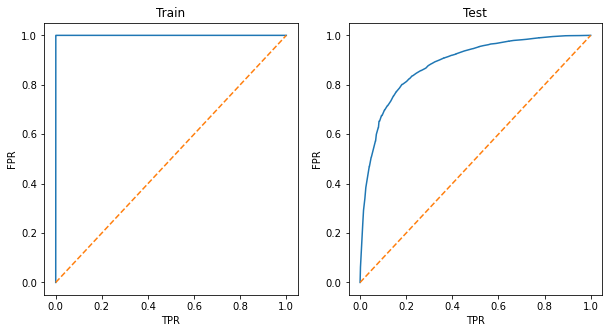

Train AUC: 0.9999966799057092
Test AUC: 0.8838710213623726
TF-IDF
RandomForestClassifier
Accuracy:
0.8651553069336081
Confusion Matrix:
[[ 410  796]
 [ 120 5467]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.34      0.47      1206
           1       0.87      0.98      0.92      5587

    accuracy                           0.87      6793
   macro avg       0.82      0.66      0.70      6793
weighted avg       0.86      0.87      0.84      6793



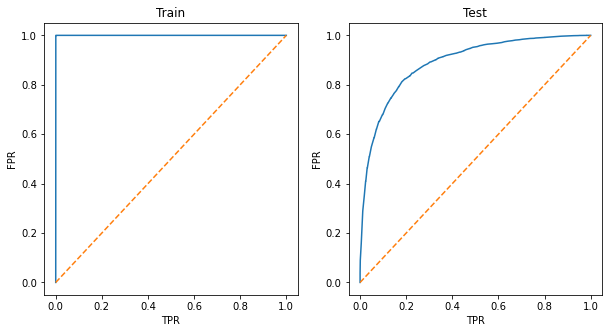

Train AUC: 0.9999951065276921
Test AUC: 0.8898963211506457
2-GRAM
RandomForestClassifier
Accuracy:
0.8301192403945238
Confusion Matrix:
[[ 145 1061]
 [  93 5494]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.12      0.20      1206
           1       0.84      0.98      0.90      5587

    accuracy                           0.83      6793
   macro avg       0.72      0.55      0.55      6793
weighted avg       0.80      0.83      0.78      6793



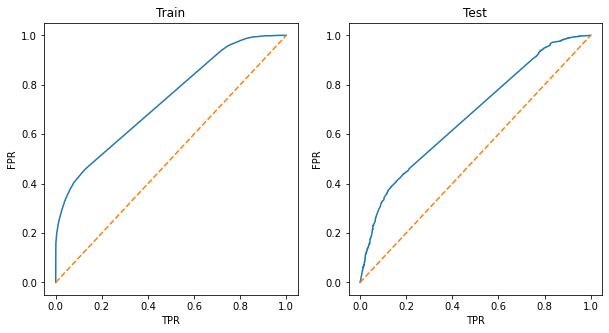

Train AUC: 0.7361923345289674
Test AUC: 0.6748004058224479
3-GRAM
RandomForestClassifier
Accuracy:
0.8224643014868247
Confusion Matrix:
[[   0 1206]
 [   0 5587]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1206
           1       0.82      1.00      0.90      5587

    accuracy                           0.82      6793
   macro avg       0.41      0.50      0.45      6793
weighted avg       0.68      0.82      0.74      6793



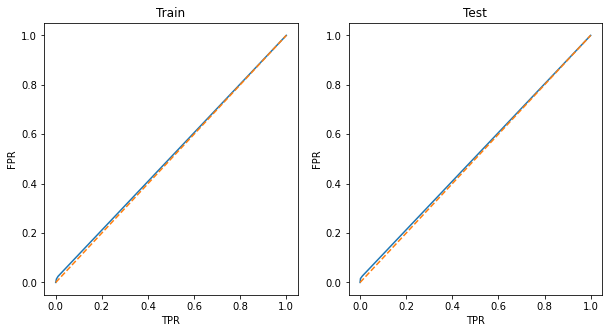

Train AUC: 0.5073753027919325
Test AUC: 0.5081474674239328


In [83]:
for i in range(len(Train_set)):
  if i ==0:
    print('Word to Vector')
  elif i ==1:
    print('TF-IDF')
  elif i ==2:
    print('2-GRAM')
  else:
    print('3-GRAM')
  train_model(rf, Train_set[i], y_train,Test_set[i], is_neural_net=False)

### 3.6 Adaboost

Word to Vector
AdaBoostClassifier
Accuracy:
0.8541145296628883
Confusion Matrix:
[[ 286  920]
 [  71 5516]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.24      0.37      1206
           1       0.86      0.99      0.92      5587

    accuracy                           0.85      6793
   macro avg       0.83      0.61      0.64      6793
weighted avg       0.85      0.85      0.82      6793



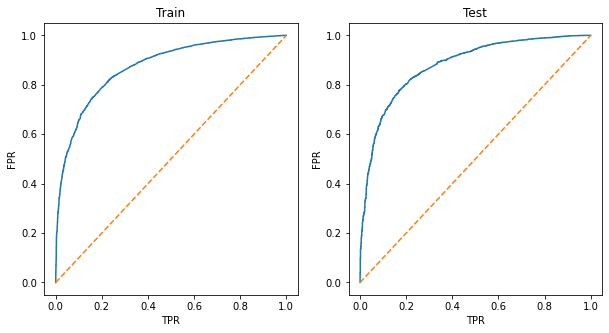

Train AUC: 0.8738895384628923
Test AUC: 0.8793208054352663
TF-IDF
AdaBoostClassifier
Accuracy:
0.8551450022081555
Confusion Matrix:
[[ 305  901]
 [  83 5504]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.25      0.38      1206
           1       0.86      0.99      0.92      5587

    accuracy                           0.86      6793
   macro avg       0.82      0.62      0.65      6793
weighted avg       0.85      0.86      0.82      6793



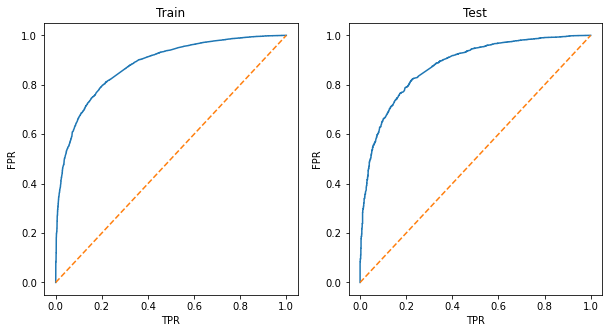

Train AUC: 0.879292305234802
Test AUC: 0.8775592831142895
2-GRAM
AdaBoostClassifier
Accuracy:
0.8337994994847637
Confusion Matrix:
[[ 118 1088]
 [  41 5546]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.10      0.17      1206
           1       0.84      0.99      0.91      5587

    accuracy                           0.83      6793
   macro avg       0.79      0.55      0.54      6793
weighted avg       0.82      0.83      0.78      6793



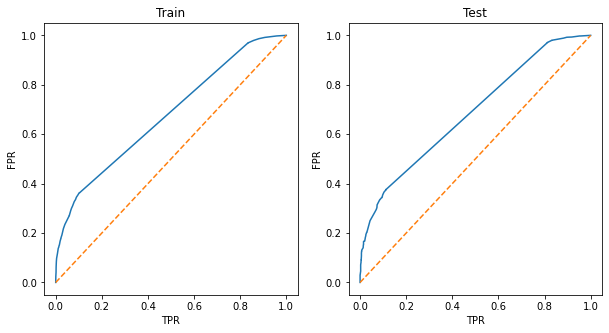

Train AUC: 0.6768928637573307
Test AUC: 0.6862845844757479
3-GRAM
AdaBoostClassifier
Accuracy:
0.8224643014868247
Confusion Matrix:
[[   0 1206]
 [   0 5587]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1206
           1       0.82      1.00      0.90      5587

    accuracy                           0.82      6793
   macro avg       0.41      0.50      0.45      6793
weighted avg       0.68      0.82      0.74      6793



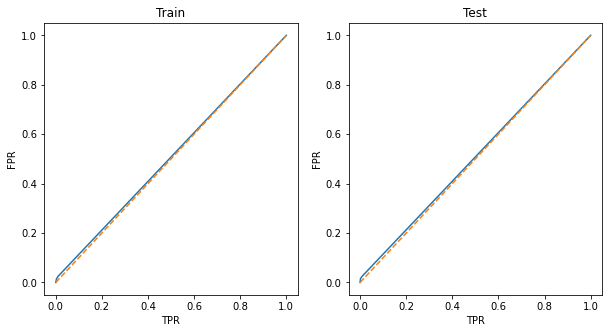

Train AUC: 0.5073753027919325
Test AUC: 0.5081477642513523


In [84]:
for i in range(len(Train_set)):
  if i ==0:
    print('Word to Vector')
  elif i ==1:
    print('TF-IDF')
  elif i ==2:
    print('2-GRAM')
  else:
    print('3-GRAM')
  train_model(abc, Train_set[i], y_train,Test_set[i], is_neural_net=False)

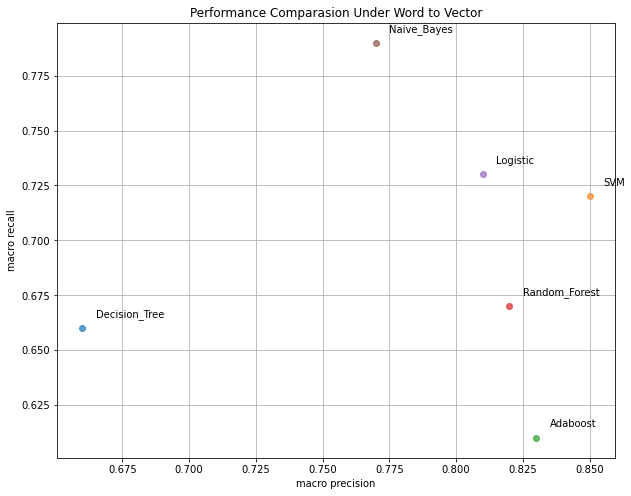

In [145]:
Decision_Tree=(0.66,0.66)
SVM=(0.85,0.72)
Adaboost=(0.83,0.61)
Random_Forest=(0.82,0.67)
Logistic=(0.81,0.73)
Naive_Bayes=(0.77,0.79)
models=[Decision_Tree,SVM,Adaboost,Random_Forest,Logistic,Naive_Bayes]
txt=['Decision_Tree','SVM','Adaboost','Random_Forest','Logistic','Naive_Bayes']
plt.figure(figsize=(10,8))
for model in models:
    plt.scatter(model[0], model[1],alpha=0.7)
for i in range(len(models)):
    plt.annotate(txt[i], xy = (models[i][0], models[i][1]), xytext = (models[i][0]+0.005, models[i][1]+0.005)) 
plt.title('Performance Comparasion Under Word to Vector')
plt.xlabel('macro precision')
plt.ylabel('macro recall')
plt.grid(True)
plt.show()

Best Model is Naive Bayes

### 3.7 GRU

In [93]:
train_model(is_neural_net=True)

100%|████████████████████████████████████████████████████████████████████████████████| 680/680 [38:46<00:00,  3.42s/it]

NoneType
Accuracy:
0.7338436625938466
Confusion Matrix:
[[ 174 1032]
 [ 776 4811]]
Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.14      0.16      1206
           1       0.82      0.86      0.84      5587

    accuracy                           0.73      6793
   macro avg       0.50      0.50      0.50      6793
weighted avg       0.71      0.73      0.72      6793



# Part 5 meta feature enhance

In [146]:
from sklearn import preprocessing
X_train_enhance=np.c_[X_train_w2v.A,train_meta]
X_test_enhance=np.c_[X_test_w2v.A,test_meta]
# scaler = preprocessing.StandardScaler().fit(X_train_enhance)
# X_train_enhance=scaler.transform(X_train_enhance) 
# X_test_enhance=scaler.transform(X_test_enhance)


MultinomialNB
Accuracy:
0.8682467245694097
Confusion Matrix:
[[ 821  385]
 [ 510 5077]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.68      0.65      1206
           1       0.93      0.91      0.92      5587

    accuracy                           0.87      6793
   macro avg       0.77      0.79      0.78      6793
weighted avg       0.87      0.87      0.87      6793



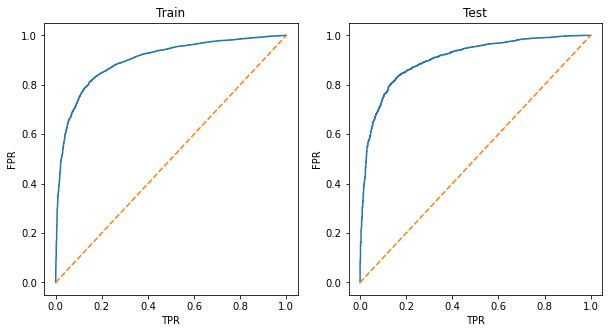

Train AUC: 0.9006302712330364
Test AUC: 0.9039603011136075


In [147]:
mnb = MultinomialNB()
train_model(mnb, X_train_enhance, y_train,X_test_enhance, is_neural_net=False)

# Part6 Feature Selection

## 1-Select Best

In [148]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selectkbest = SelectKBest(chi2, k=400)
selectkbest.fit(X_train_enhance, y_train)
X_train_vec2 = selectkbest.transform(X_train_enhance)
X_test_vec2 = selectkbest.transform(X_test_enhance)

MultinomialNB
Accuracy:
0.868835566023848
Confusion Matrix:
[[ 823  383]
 [ 508 5079]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.68      0.65      1206
           1       0.93      0.91      0.92      5587

    accuracy                           0.87      6793
   macro avg       0.77      0.80      0.78      6793
weighted avg       0.87      0.87      0.87      6793



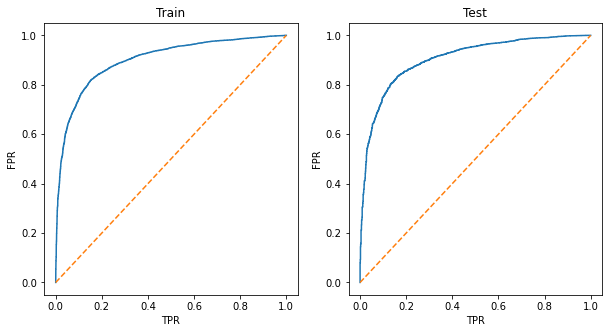

Train AUC: 0.90080091607935
Test AUC: 0.9041660025153155


In [149]:
mnb = MultinomialNB()
train_model(mnb, X_train_vec2, y_train,X_test_vec2, is_neural_net=False)

In [150]:
res=[]
meta_col=['META:char_count','META:word_count','META:word_density','META:punctuation_count','META:title_word_count']
for i in selectkbest.get_support(indices=True):
    if i<len(word2vec.get_feature_names()):
        res.append(word2vec.get_feature_names()[i])
    else:
        res.append(meta_col[i-433])

In [151]:
# Empirical log probability of features given a class 1 (recommendation)
coeff_df = pd.DataFrame(mnb.feature_log_prob_[1,:].flatten(),res, columns=['Log Probability'])  
coeff_df = coeff_df.sort_values(by=['Log Probability'], ascending=False)

# display the 50 most informative features (recommendation)
coeff_df.head(50)

,Log Probability
META:char_count,-0.245371
META:word_count,-1.851833
META:title_word_count,-4.902260
META:punctuation_count,-4.922539
dress,-6.723349
love,-6.802790
size,-6.833045
fit,-7.077294
wear,-7.128562
great,-7.151218


## 2-Logistic Regularization

In [152]:
from sklearn.feature_selection import SelectFromModel

In [153]:
lr = LogisticRegression(C=0.1, penalty="l1", solver='liblinear')
lr.fit(X_train_enhance, y_train)
lr.coef_
selector = SelectFromModel(lr, prefit=True,max_features=400,threshold=-np.inf)
X_train_vec3 = selector.transform(X_train_enhance)
X_test_vec3 = selector.transform(X_test_enhance)
X_train_vec3.shape

(15848, 400)

MultinomialNB
Accuracy:
0.8692771971146769
Confusion Matrix:
[[ 809  397]
 [ 491 5096]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.67      0.65      1206
           1       0.93      0.91      0.92      5587

    accuracy                           0.87      6793
   macro avg       0.78      0.79      0.78      6793
weighted avg       0.87      0.87      0.87      6793



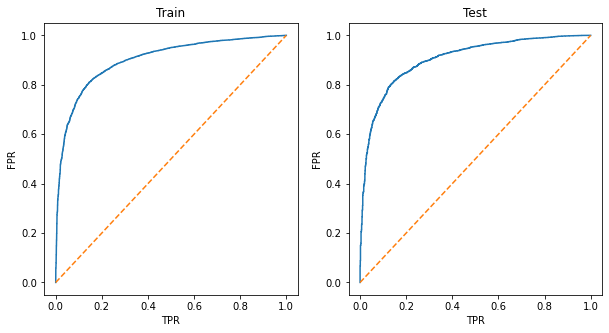

Train AUC: 0.9010638302127781
Test AUC: 0.9036520458384647


In [154]:
# train the model using training set
mnb = MultinomialNB()
train_model(mnb, X_train_vec3, y_train,X_test_vec3, is_neural_net=False)

In [155]:
res=[]
meta_col=['META:char_count','META:word_count','META:word_density','META:punctuation_count','META:title_word_count']
for i in selector.get_support(indices=True):
    if i<len(word2vec.get_feature_names()):
        res.append(word2vec.get_feature_names()[i])
    else:
        print(i)
        res.append(meta_col[i-433])

433
434
435
436
437


In [156]:
# Empirical log probability of features given a class 1 (spam)
coeff_df = pd.DataFrame(mnb.feature_log_prob_[1,:].flatten(),res, columns=['feature_log_prob'])  
coeff_df = coeff_df.sort_values(by=['feature_log_prob'], ascending=False)

# display the 50 most informative features (indicate spam)
coeff_df.head(50)

,feature_log_prob
META:char_count,-0.258361
META:word_count,-1.864823
META:word_density,-4.366898
META:title_word_count,-4.915250
META:punctuation_count,-4.935529
dress,-6.736339
love,-6.815780
size,-6.846035
fit,-7.090284
wear,-7.141552


# Part7 SMOTE To Deal with imbalance label

In [132]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)

os_data_X,os_data_Y=os.fit_resample(X_train_enhance, y_train)

MultinomialNB
Accuracy:
0.8329162373031062
Confusion Matrix:
[[1004  202]
 [ 933 4654]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.83      0.64      1206
           1       0.96      0.83      0.89      5587

    accuracy                           0.83      6793
   macro avg       0.74      0.83      0.77      6793
weighted avg       0.88      0.83      0.85      6793



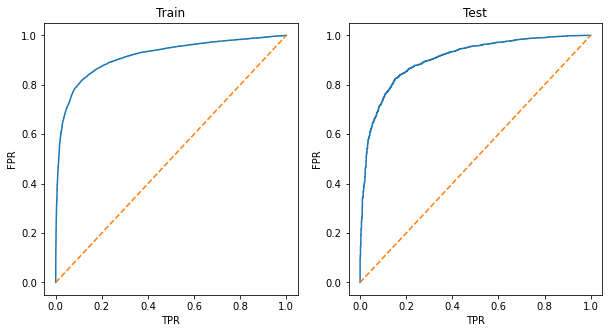

Train AUC: 0.9162803224306391
Test AUC: 0.9047109776575033


In [133]:
train_model(mnb, os_data_X, os_data_Y ,X_test_enhance, is_neural_net=False,os_data=True)

# Voting Classifier

In [134]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

In [135]:
model = MultinomialNB()
param_grid = {'alpha': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]
    }
grid_search = GridSearchCV(model, param_grid, n_jobs = 8, verbose=1)
grid_search.fit(X_train_enhance,y_train)
best_parameters = grid_search.best_estimator_.get_params()
for para, val in list(best_parameters.items()):
    print(para, val)
mnb_best = MultinomialNB(alpha=best_parameters['alpha'])

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  35 out of  35 | elapsed:   11.6s finished


alpha 0.001
class_prior None
fit_prior True


In [136]:
model = LogisticRegression()
param_grid = {'penalty':['l1','lr','elasticnet'],
        'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000], 
        'solver':['newton-cg','lbfgs','liblinear','sag','saga']

}
grid_search = GridSearchCV(model, param_grid, n_jobs = 8, verbose=1)
grid_search.fit(X_train_enhance,y_train)
best_parameters = grid_search.best_estimator_.get_params()
for para, val in list(best_parameters.items()):
    print(para, val)
logit_best = LogisticRegression(penalty=best_parameters['penalty'],
            C=best_parameters['C'],
            solver=best_parameters['solver']  ,

)

Fitting 5 folds for each of 105 candidates, totalling 525 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  4.5min
[Parallel(n_jobs=8)]: Done 525 out of 525 | elapsed:  6.1min finished


C 1
class_weight None
dual False
fit_intercept True
intercept_scaling 1
l1_ratio None
max_iter 100
multi_class auto
n_jobs None
penalty l1
random_state None
solver liblinear
tol 0.0001
verbose 0
warm_start False


In [137]:
model = AdaBoostClassifier()
param_grid = {'n_estimators':[5,10,20,50,100],
        'learning_rate':[0.1,0.3,0.5,0.7,0.9,1]
    
}
grid_search = GridSearchCV(model, param_grid, n_jobs = 8, verbose=1)
grid_search.fit(X_train_enhance,y_train)
best_parameters = grid_search.best_estimator_.get_params()
for para, val in list(best_parameters.items()):
    print(para, val)
abc_best = AdaBoostClassifier(n_estimators=best_parameters['n_estimators'],
                  learning_rate=best_parameters['learning_rate'])

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:  8.2min finished


algorithm SAMME.R
base_estimator None
learning_rate 1
n_estimators 100
random_state None


In [138]:
#create a dictionary of our models
estimators=[('mnb', mnb_best), ('logit', logit_best), ('abc', abc_best)]

In [139]:
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='soft')

VotingClassifier
Accuracy:
0.8797291329309583
Confusion Matrix:
[[ 760  446]
 [ 371 5216]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.63      0.65      1206
           1       0.92      0.93      0.93      5587

    accuracy                           0.88      6793
   macro avg       0.80      0.78      0.79      6793
weighted avg       0.88      0.88      0.88      6793



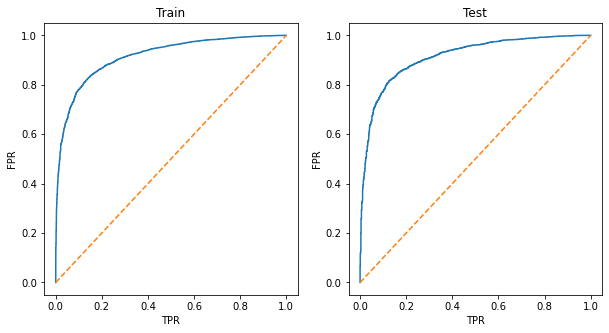

Train AUC: 0.9156197636012863
Test AUC: 0.913133900926725


In [140]:
train_model(ensemble, X_train_enhance, y_train,X_test_enhance, is_neural_net=False)

VotingClassifier
Accuracy:
0.8810540262034448
Confusion Matrix:
[[ 757  449]
 [ 359 5228]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.63      0.65      1206
           1       0.92      0.94      0.93      5587

    accuracy                           0.88      6793
   macro avg       0.80      0.78      0.79      6793
weighted avg       0.88      0.88      0.88      6793



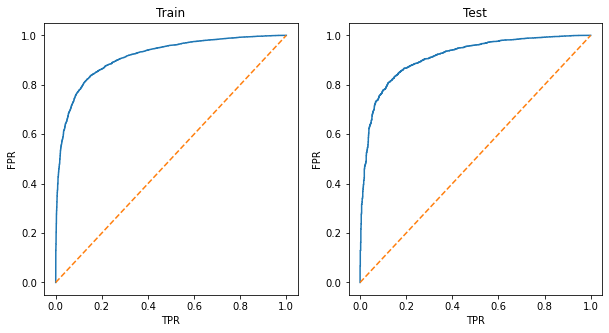

Train AUC: 0.9148470749902631
Test AUC: 0.91341158297766


In [141]:
train_model(ensemble, X_train_vec2, y_train,X_test_vec2, is_neural_net=False)

VotingClassifier
Accuracy:
0.8803179743853967
Confusion Matrix:
[[ 752  454]
 [ 359 5228]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.62      0.65      1206
           1       0.92      0.94      0.93      5587

    accuracy                           0.88      6793
   macro avg       0.80      0.78      0.79      6793
weighted avg       0.88      0.88      0.88      6793



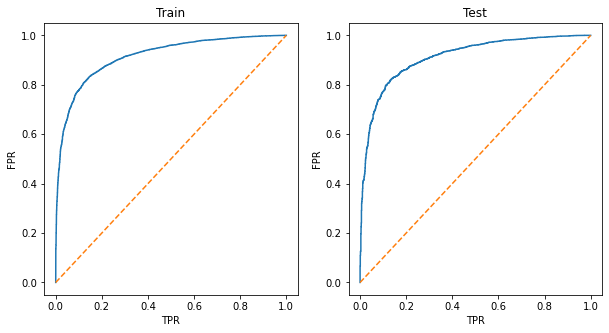

Train AUC: 0.9152688736360113
Test AUC: 0.9122891300908499


In [142]:
train_model(ensemble, X_train_vec3, y_train,X_test_vec3, is_neural_net=False)

VotingClassifier
Accuracy:
0.8445458560282644
Confusion Matrix:
[[ 989  217]
 [ 839 4748]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.82      0.65      1206
           1       0.96      0.85      0.90      5587

    accuracy                           0.84      6793
   macro avg       0.75      0.83      0.78      6793
weighted avg       0.88      0.84      0.86      6793



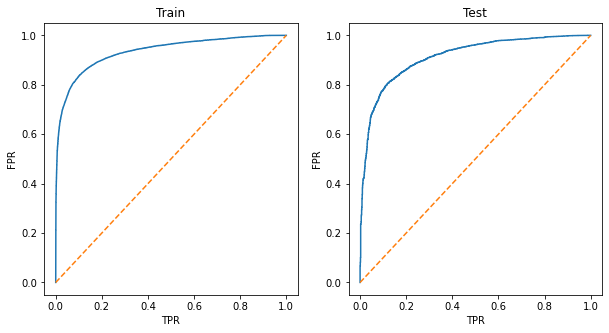

Train AUC: 0.9346925655575979
Test AUC: 0.9136857030995609


In [143]:
train_model(ensemble, os_data_X, os_data_Y,X_test_enhance, is_neural_net=False,os_data=True)